# Part 2: Clients and Datasite Access

<br>

<div align="center">
    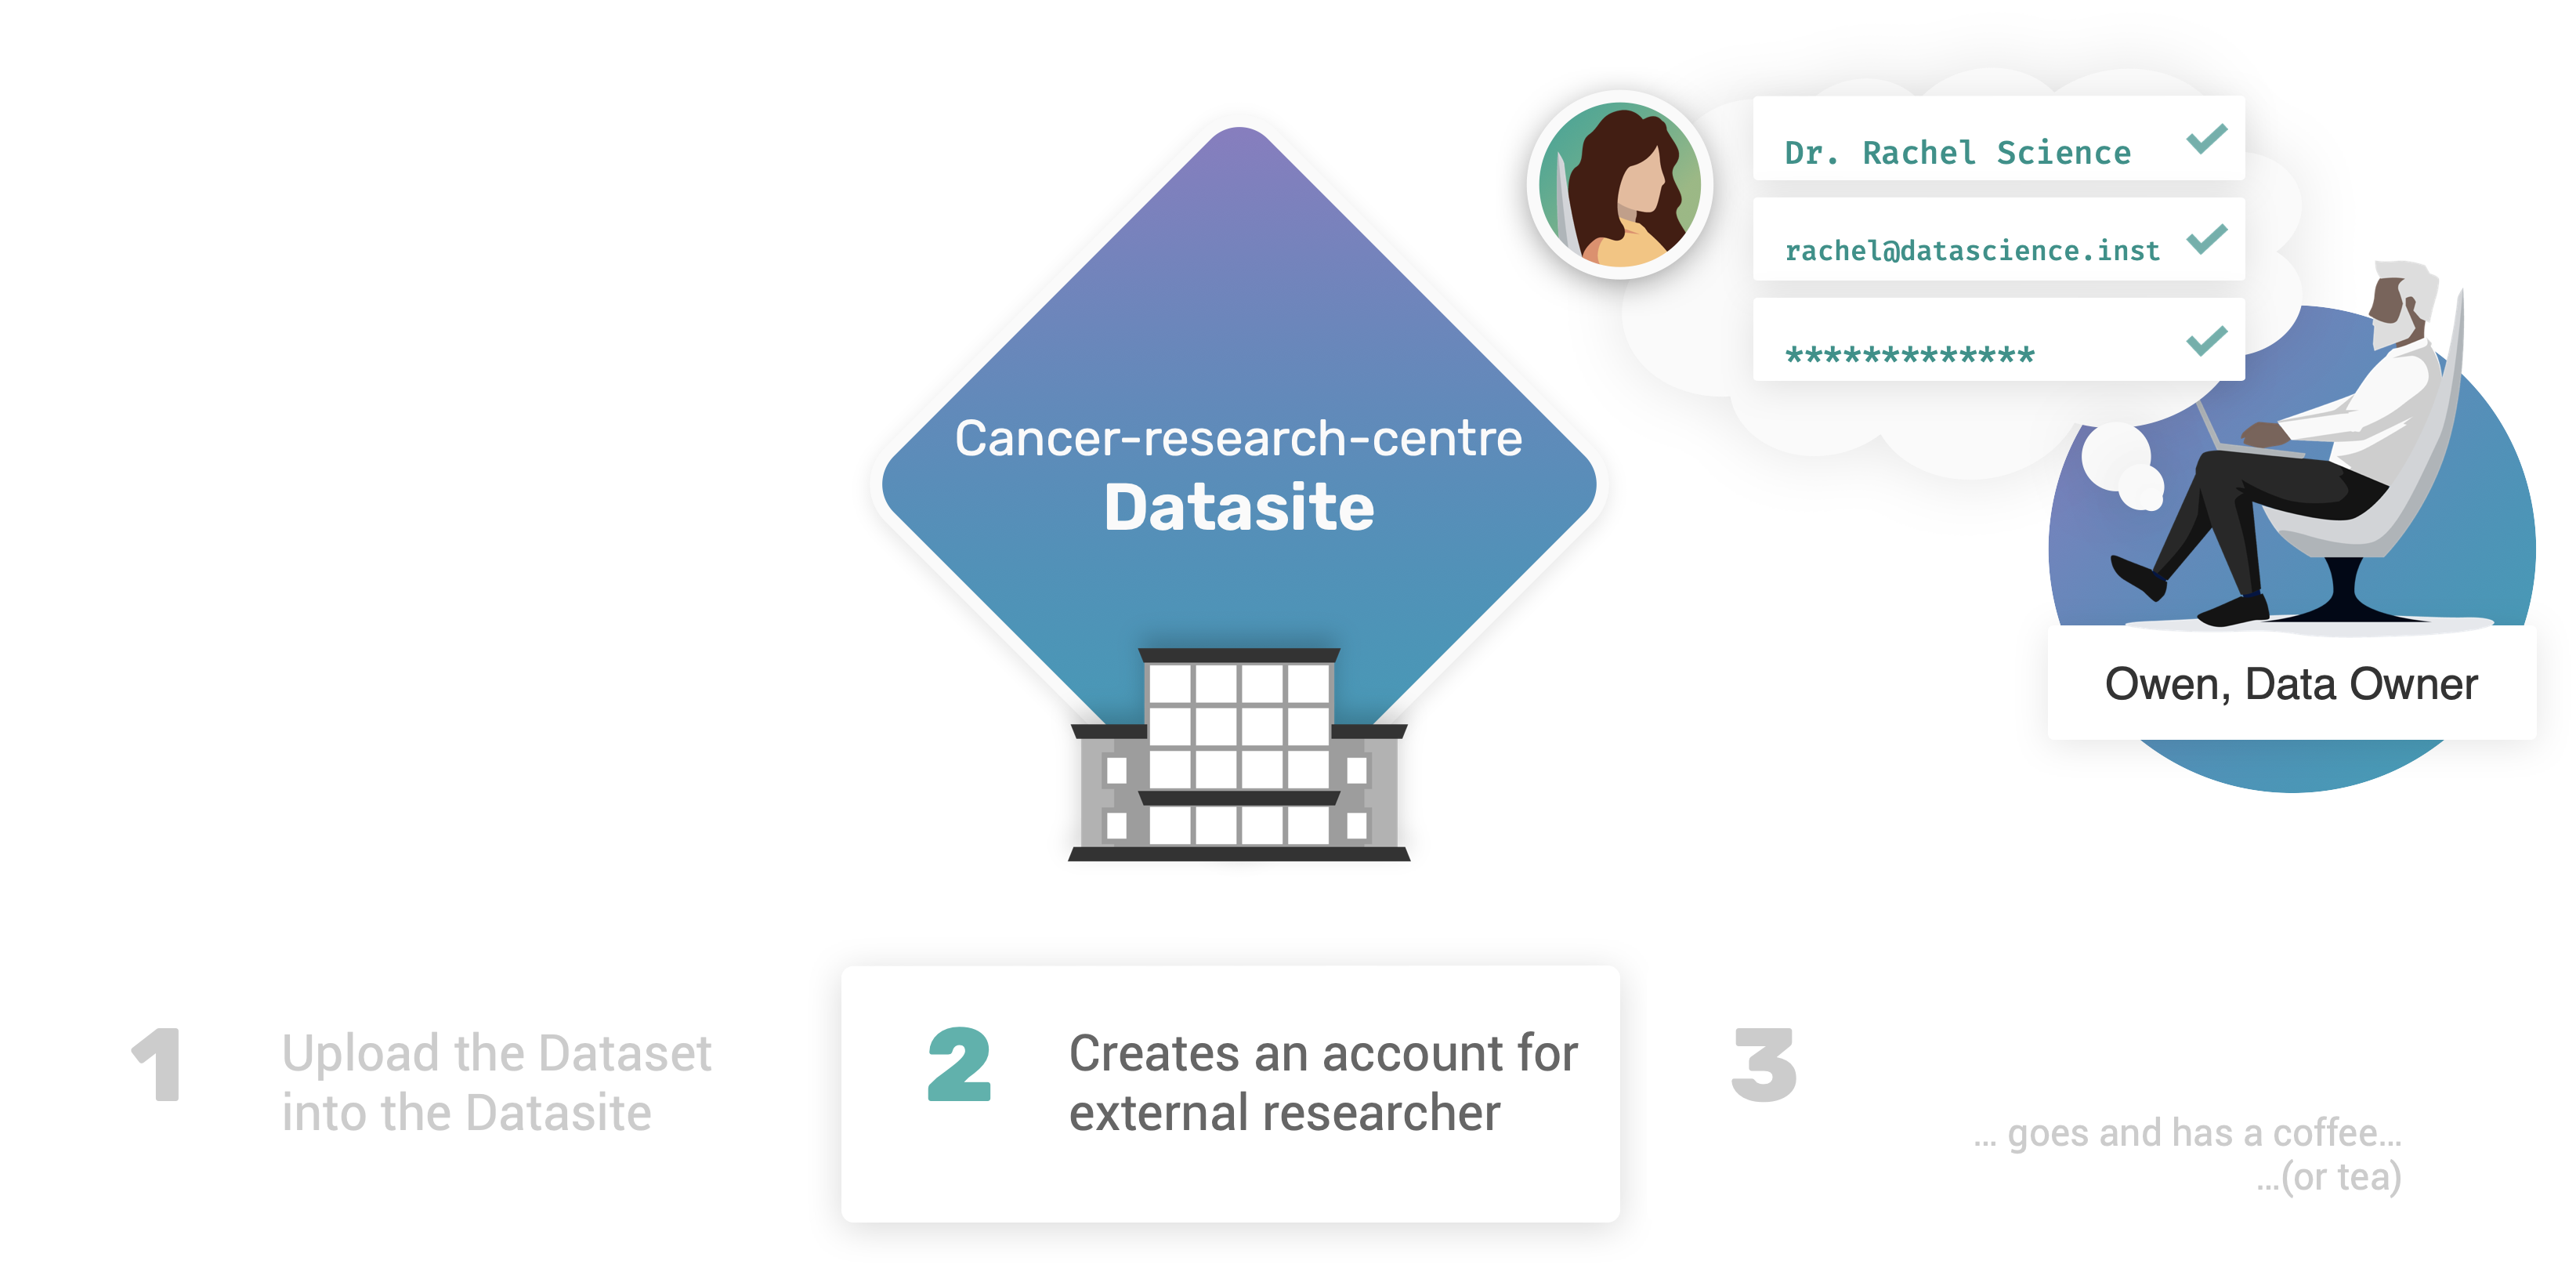
</div>

<br>

Once our new `cancer-research-centre` Datasite has been setup with the newly created datasets (and assets), the next step for Owen will be to configure the access credentials and policies, in order to enable Rachel to operate on the Datasite as _Data Scientist_. 

## What you will learn:



By the end of **part 2**, you will learn:

- How to reconnect to a local development server, restoring persistency;
- How to modify _default_ admin credentials for a Datasite;
- How to register a new user to a Datasite as Data Scientist.

## |:data_scientist:| 2.1. Reconnecting to the Datasite

At the end of [**part 1**](./part1-dataset-and-assets.ipynb), after uploading the "Breast Cancer Dataset" to the Datasite, we called the `data_site.land()` function to *shutdown* the server. 
To reconnect we can now call the `syft.orchestra.launch` function again, using _the same_ value for the `name` parameter, namely `name="cancer-research-centre"`.

However, this time, we are going to explicitly pass `reset=False` (i.e. _default_ for the parameter) so that we make sure that **persistency is restored**. In other words, when we reconnect to the Datasite, 
we will expect to find the "Breast Cancer Dataset" already uploaded on the Datasite.

In [1]:
import syft as sy

data_site = sy.orchestra.launch(name="cancer-research-centre", reset=False)

# logging in as root client with default credentials
client = data_site.login(email="info@openmined.org", password="changethis")

SyftInfo: You have launched a development server at http://0.0.0.0:None.It is intended only for local use.

Logged into <cancer-research-centre: High side Datasite> as <info@openmined.org>


SyftWarning: You are using a default password. Please change the password using `[your_client].account.set_password([new_password])`.

Let's quickly double-check that the `Breast Cancer Dataset` is present, and accessible through the available `datasets`:

In [2]:
client.datasets

It is **indeed**! 🤓 

```{admonition} Persistency using a local dev server
:class: tip
The important _take away_ lessons here are (a) using the **same name** for the local development server will guarantee continuity and persistency throughout multiple instances; (b) use the `reset=True` parameter only the first time, or when you want to re-initialise the whole server. 
```

## |:data_scientist:| 2.2. Updating default admin credentials

When we connected to the Datasite for the first time in [**part 1**](./part1-dataset-and-assets.ipynb#1.1-Launch-a-local-development-Datasite), we emphasised that Owen was initially using the credentials provided by default in PySyft. 
As part of Owen's operations to setup the `cancer-research-centre` Datasite, it is now the time for them to set their own credentials, and to update their profile information.

The PySyft `client` instance allows to refer to the current logged user via the `account` property. More details on [updating accounts are available here](../components/users-api.ipynb#update-user-information).

To update email, and password, we can use the functions <code>client.account.set_email([new_email])</code> and <code>client.account.set_password([new_password])</code>, respectively. 

To update profile information, we can use <code>client.account.update([name, institution, website, role])</code>. 

In [3]:
OWEN_EMAIL = "owen@cancer-research.science"
OWEN_PASSWD = "cancer_research_syft_admin"

client.account.set_email(OWEN_EMAIL)

# we can bypass the confirmation by using the confirm=False parameter
client.account.set_password(OWEN_PASSWD, confirm=False)

SyftSuccess: Successfully updated password for user 'Jane Doe' with email 'owen@cancer-research.science'.

Let's now change Owen's profile information:

In [4]:
client.account.update(name="Owen, the Data Owner", 
                 institution="Cancer Research Centre")

SyftSuccess: User details successfully updated.

Let's now immediately test our new credentials by instantiating a new (root) client, and accessing registered users info:

In [5]:
client = data_site.login(email=OWEN_EMAIL, password=OWEN_PASSWD)

Logged into <cancer-research-centre: High side Datasite> as <owen@cancer-research.science>


In [6]:
client.users

As expected, the new credentials worked, and all the information in Owen's profile have been updated accordingly! 🤓

From now on, the next time Owen's will connect again to the Datasite, they will use these new set of credentials.

## |:data_scientist:| 2.3. Register Rachel's Account

The last problem Owen needs to solve is to allow Rachel to connect to the Datasite! In other words, Owen needs to add a new user on the Datasite, to be registered with the role of Data Scientist! There are multiple ways to do it are [available](../components/users-api.ipynb#configure-registration-workflow) and we present one below.

We can use the `client.users.create()` function, which expects the following parameters:

- `name` (type: str): mandatory
- `email` (type: str): mandatory
- `password` (type: str): mandatory
- `password_verify` (type_str): mandatory
- `institution` (type: str): optional
- `website` (type: str): optional

Let's use this function to create a new account for Rachel:

In [7]:
rachel_account_info = client.users.create(
    email="rachel@datascience.inst",
    name="Dr. Rachel Science",
    password="syftrocks",
    password_verify="syftrocks",
    institution="Data Science Institute",
    website="https://datascience_institute.research.data"
)

The function returns a `UserView` instance, including _read-only_ information about the newly created account.

In [8]:
print(f"New User: {rachel_account_info.name} ({rachel_account_info.email}) registered as {rachel_account_info.role}")

New User: Dr. Rachel Science (rachel@datascience.inst) registered as ServiceRole.DATA_SCIENTIST


By default, the new account for Rachel has been registered to the Datasite by default as _data scientist_. 

To verify that the account has been successfully added to the Datasite, we can see again the list of available users:

In [9]:
client.users

## Congrats on completing Part 2 🎉

Well done for completing **part 2** of the tutorial! 👏 

By now, our new `cancer-research-centre` Datasite is fully configured! We have hosted a new `syft.Dataset` including assets for _features_ and _targets_ for the "Breast Cancer Biomarker" data, and we have also created the access credentials to allow Rachel to access the node. 

Owen's job as Data Owner is complete for now! 

In the next [**part 3**](./part3-research-study.ipynb), we will explore how the workflow would look like from an external data scientist perspective, who is willing to run their study on the dataset hosted on our Datasite.

<br>

<div align="center">
    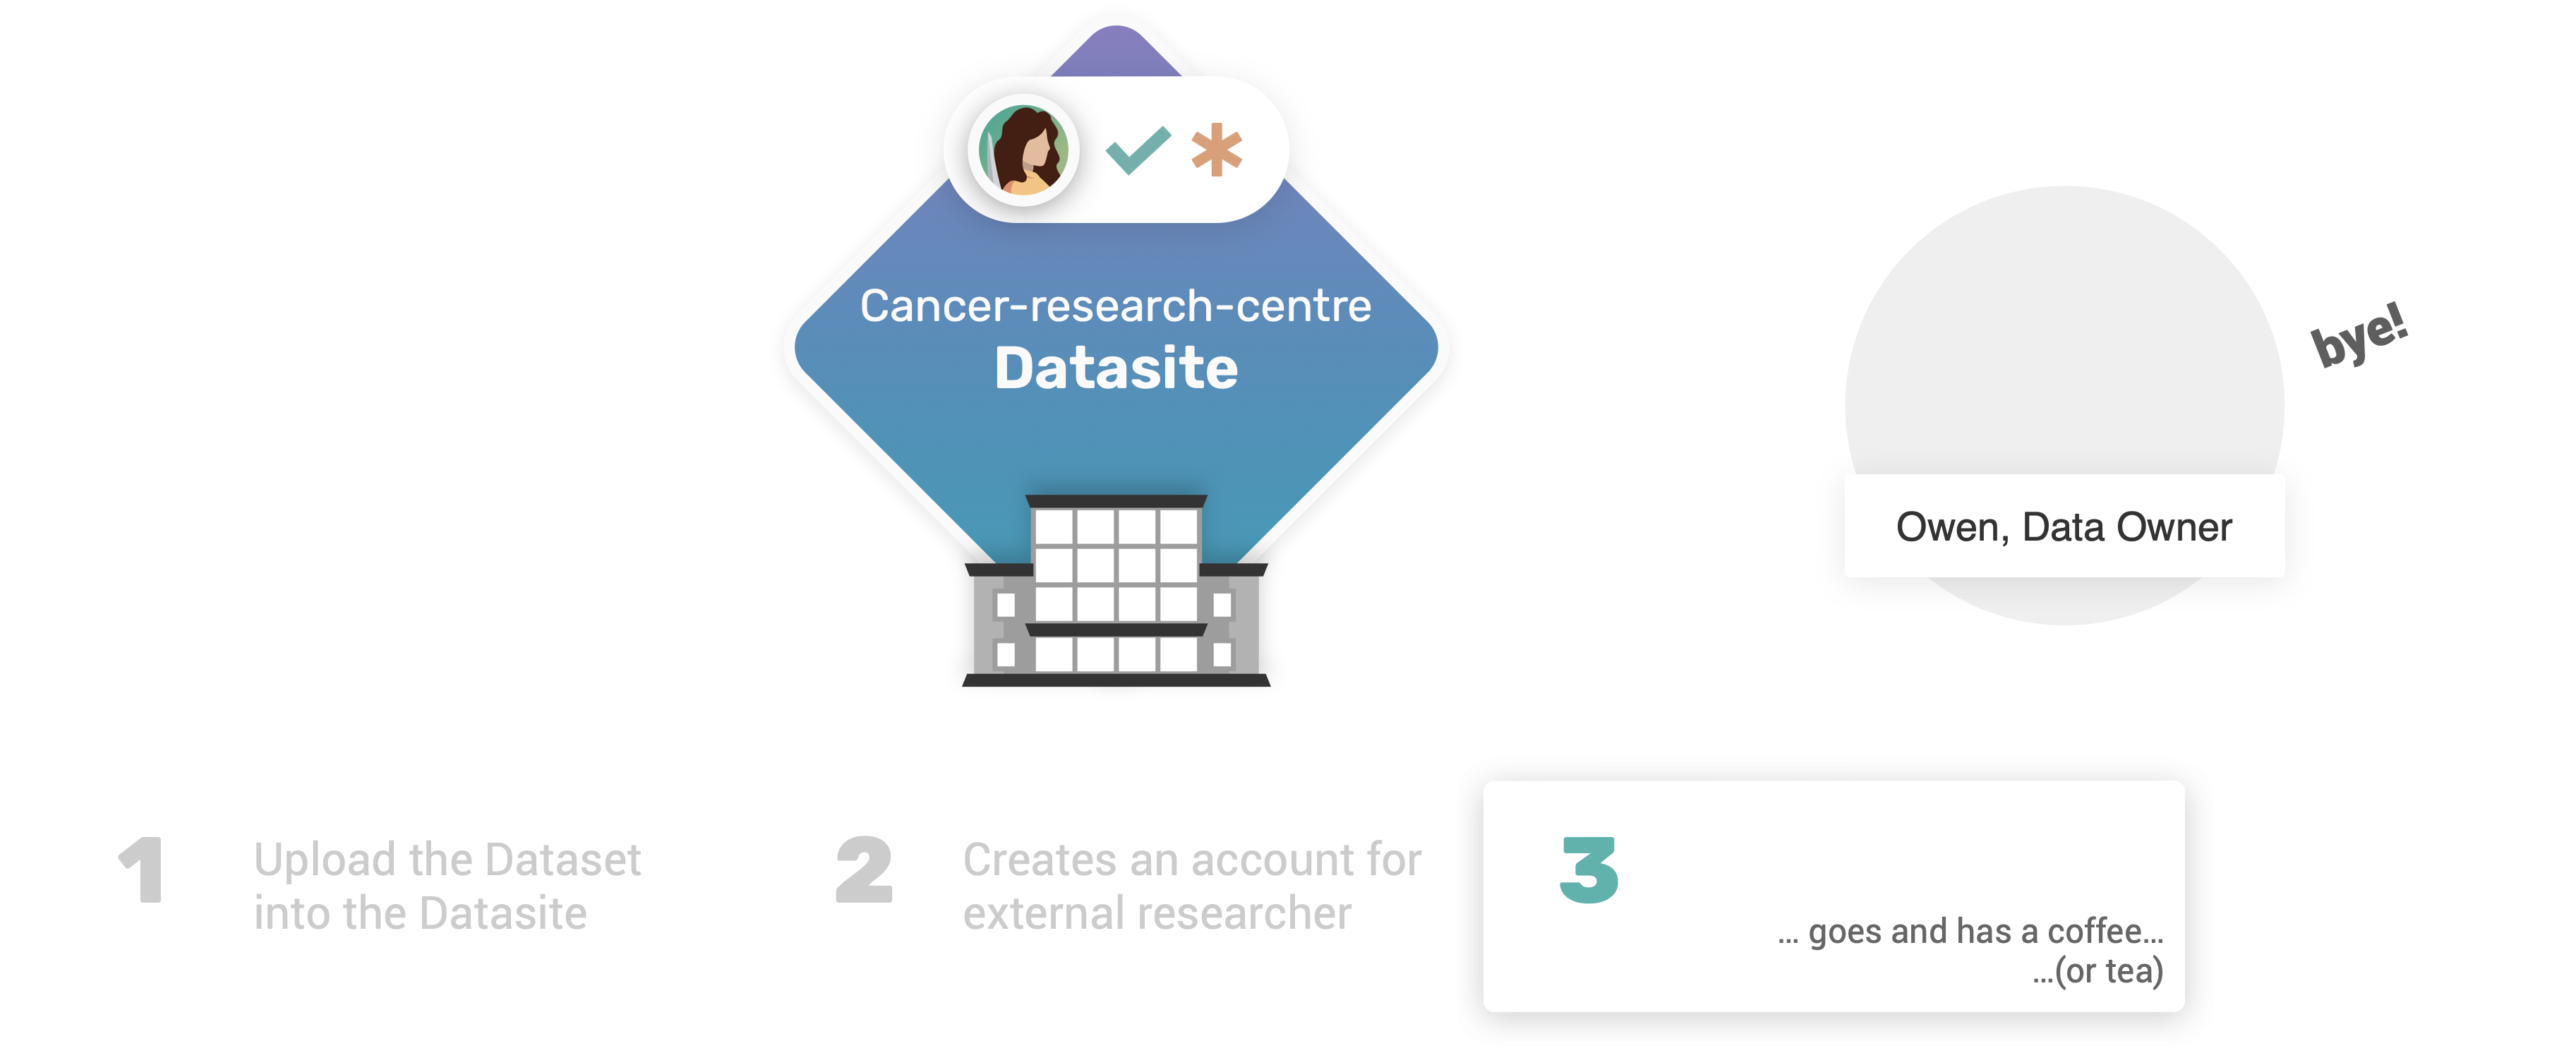
</div>

<bR>